<a href="https://colab.research.google.com/github/Aryan-B25/CSC637/blob/main/semanticP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/NLP Projects/SemanticP1/corpus.csv", encoding="ISO-8859-1")
df.head()


,text,label
0,Stuning even for the non-gamer: This sound tr...,__label__2
1,The best soundtrack ever to anything.: I'm re...,__label__2
2,Amazing!: This soundtrack is my favorite musi...,__label__2
3,Excellent Soundtrack: I truly like this sound...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After H...",__label__2


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

texts = df['text'].astype(str).values
labels = df['label'].str.strip().values


label_encoder = LabelEncoder()
binary_labels = label_encoder.fit_transform(labels)


vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = vectorizer.fit_transform(texts)


print("TF-IDF shape:", X_tfidf.shape)


TF-IDF shape: (10000, 1000)


In [4]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, binary_labels, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 8000
Testing samples: 2000


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential([
    Dense(128, activation='relu', input_shape=(1000,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         128,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,449 (533.00 KB)

 Trainable params: 136,449 (533.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    X_train.toarray(), y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)


Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6663 - loss: 0.6263 - val_accuracy: 0.8388 - val_loss: 0.3702
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8710 - loss: 0.3085 - val_accuracy: 0.8338 - val_loss: 0.3738
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8940 - loss: 0.2634 - val_accuracy: 0.8300 - val_loss: 0.3915
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9119 - loss: 0.2252 - val_accuracy: 0.8313 - val_loss: 0.4090
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9406 - loss: 0.1766 - val_accuracy: 0.8338 - val_loss: 0.4392


In [7]:
test_loss, test_accuracy = model.evaluate(X_test.toarray(), y_test)

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8276 - loss: 0.4617
Test Accuracy: 0.82
Test Loss: 0.47


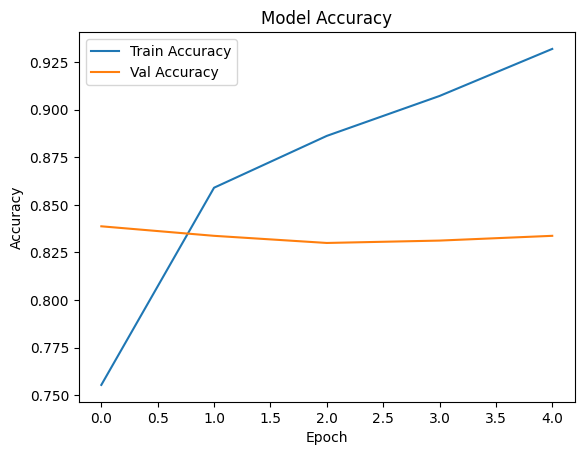

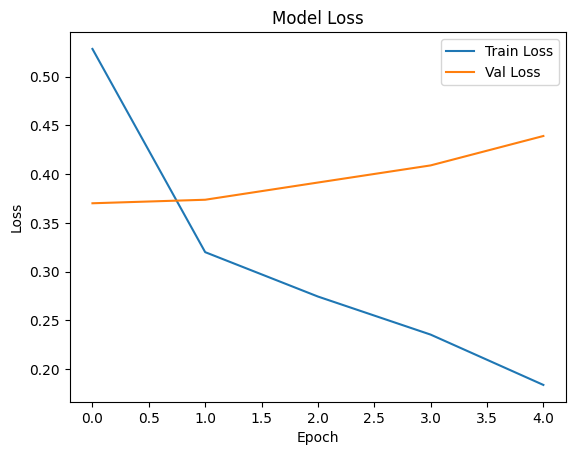

In [8]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [9]:
import numpy as np

# Predict probabilities
y_probs = model.predict(X_test.toarray())

# Convert probabilities to binary labels (0 or 1)
y_pred = (y_probs > 0.5).astype("int").flatten()

# Show first 10 predictions vs actual
for i in range(10):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 0
Predicted: 0, Actual: 0


              precision    recall  f1-score   support

  __label__1       0.81      0.86      0.84      1037
  __label__2       0.84      0.78      0.81       963

    accuracy                           0.82      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



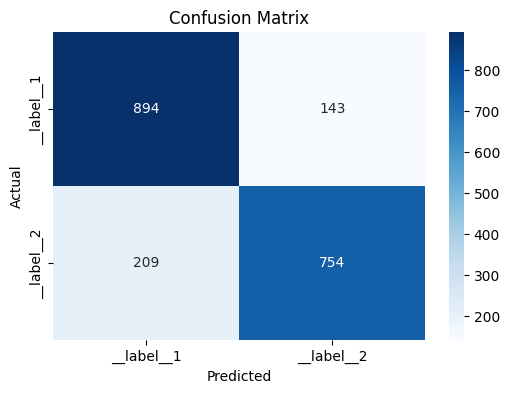

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [12]:
 model.save("sentiment_mlp_model.keras")
print("✅ Model saved as 'sentiment_mlp_model.keras'")


✅ Model saved as 'sentiment_mlp_model.keras'
